In [1]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()

In [2]:
bc.target.shape

(569,)

In [3]:
bc.data.shape

(569, 30)

In [4]:
#preprocessing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bc.data,bc.target,test_size=0.2)

In [5]:
x_train.shape

(455, 30)

In [6]:
print(len(x_test))

114


In [7]:
y_test.shape

(114,)

In [8]:
y_train.shape

(455,)

In [9]:
x_train[0]

array([1.863e+01, 2.511e+01, 1.248e+02, 1.088e+03, 1.064e-01, 1.887e-01,
       2.319e-01, 1.244e-01, 2.183e-01, 6.197e-02, 8.307e-01, 1.466e+00,
       5.574e+00, 1.050e+02, 6.248e-03, 3.374e-02, 5.196e-02, 1.158e-02,
       2.007e-02, 4.560e-03, 2.315e+01, 3.401e+01, 1.605e+02, 1.670e+03,
       1.491e-01, 4.257e-01, 6.133e-01, 1.848e-01, 3.444e-01, 9.782e-02])

In [10]:
#normalize
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train)

x_test=scaler.transform(x_test)
print(len(x_test))

114


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    
    print(f"acc train: {acc_train},acc test: {acc_test},precision:{p},recall:{r}")
    
    return acc_train, acc_test, p, r


In [12]:
#classification
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [13]:
y_pred_train=gnb.predict(x_train)
print(len(y_pred_train))
print(len(y_train))

455
455


In [14]:
y_pred_test=gnb.predict(x_test)
print(len(y_pred_test))

114


In [15]:
acc_train_gnb,acc_test_gnb,p_gnb,r_gnb = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9406593406593406,acc test: 0.9210526315789473,precision:0.9315068493150684,recall:0.9444444444444444


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28)
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [17]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [18]:
acc_train_knn,acc_test_knn,p_knn,r_knn = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.978021978021978,acc test: 0.956140350877193,precision:0.9466666666666667,recall:0.9861111111111112


In [19]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000, max_depth=16,min_samples_split=4)
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=16, min_samples_split=4, n_estimators=1000)

In [20]:
acc_train_rf,acc_test_rf,p_rf,r_rf = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.978021978021978,acc test: 0.956140350877193,precision:0.9466666666666667,recall:0.9861111111111112


In [21]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [22]:
y_pred_train=svm.predict(x_train)
y_pred_test=svm.predict(x_test)

In [23]:
acc_train_svm,acc_test_svm,p_svm,r_svm = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9846153846153847,acc test: 0.956140350877193,precision:0.9466666666666667,recall:0.9861111111111112


In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [25]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [26]:
acc_train_lr,acc_test_lr,p_lr,r_lr = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 0.9714285714285714,acc test: 0.9385964912280702,precision:0.922077922077922,recall:0.9861111111111112


In [27]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=256,activation='relu',solver='lbfgs')
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=256, solver='lbfgs')

In [28]:
y_pred_train=ann.predict(x_train)
y_pred_test=ann.predict(x_test)
acc_train_ann,acc_test_ann,p_ann,r_ann = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

acc train: 1.0,acc test: 0.9649122807017544,precision:0.9473684210526315,recall:1.0


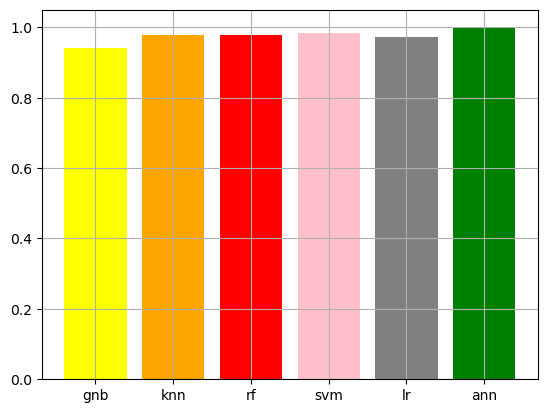

In [29]:
#comparison
import matplotlib.pyplot as plt
acc_train= [acc_train_gnb,acc_train_knn, acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title = ['gnb','knn','rf','svm','lr','ann']
colors=['yellow','orange','red','pink','gray','green']
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

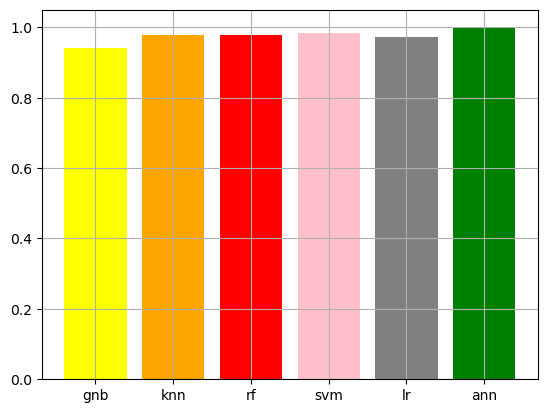

In [30]:
import matplotlib.pyplot as plt
acc_test= [acc_test_gnb,acc_test_knn, acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
title = ['gnb','knn','rf','svm','lr','ann']
colors=['yellow','orange','red','pink','gray','green']
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

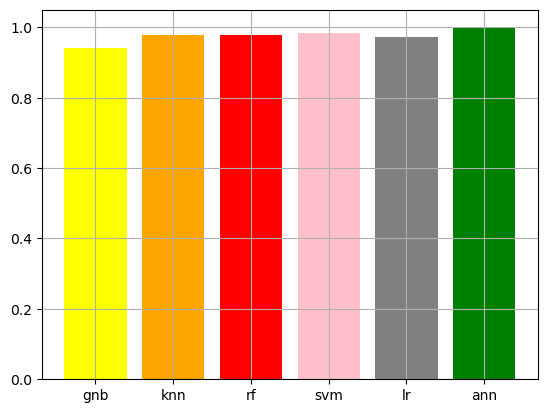

In [31]:
import matplotlib.pyplot as plt
p= [p_gnb,p_knn, acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title = ['gnb','knn','rf','svm','lr','ann']
colors=['yellow','orange','red','pink','gray','green']
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

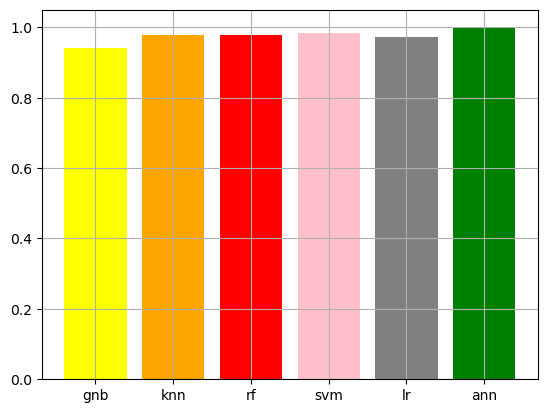

In [32]:
p= [r_gnb,r_knn, r_rf,r_svm,r_lr,r_ann]
title = ['gnb','knn','rf','svm','lr','ann']
colors=['yellow','orange','red','pink','gray','green']
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()